# Answers to exercises ch2 McE&B

Before starting off, some code to turn on equation numbering:

In [12]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## Exercise 1a
Show that the 'washing the dishes' game has the same payoff structure as the Hawk Dove game, with \begin{align}
V(H\mid H) < V(D \mid H) < V (D \mid D) < V (H \mid D),
\end{align} assuming that Wash = Dove and Rest = Hawk.

Let us calculate the different payoffs, starting at the rightmost element of the inequality above and working leftwards:
\begin{align}
V (R \mid W) = V (H \mid D) &= b \\
V (W \mid W) = V (D \mid D) &= b - \frac{k}{2} \\
V (W \mid R) = V (D \mid H) &= b - k \\
V (R \mid R) = V (H \mid H) &= 0
\end{align}. 

Hence, if $b > k$ and $k\geq0$, we have 
\begin{align}
0 < b - k < b - \frac{k}{2} < b,
\end{align} so that it is indeed the same payoff structure as for a Hawk Dove game.

## Exercise 1b

When $p$ is the frequency of Rest, show that the equilibrium frequency is \begin{align}
\hat{p} = \frac{k}{2b - k}.
\end{align}

Following the formulation of the haploid difference equation at p41 of McE&B, we know that an internal equilibrium occurs whenever the fitness of the Rest strategy is equal to that of the Wash strategy, or $W_{R} = W_{W}$. Hence, let us derive expressions for $W_{R}$ and $W_{W}$:

\begin{align}
W_{R} &= w_{0} + p \cdot 0 + (1-p) b = (1-p)b\\
W_{W} &= w_{0} + p (b-k) + (1-p) \left ( b - \frac{k}{2} \right)
\end{align}

We then put $W_{R} = W_{W} = W_{R} - W_{W} = 0$, substitute $p = \hat{p}$ and solve for $\hat{p}$, or
\begin{align}
\left . \left( W_{R} - W_{W} \right ) \right |_{p=\hat{p}} &= 0\\
\left ( 1 - \hat{p} \right) b - \left [ \hat{p} (b-k) + \left (1 - \hat{p} \right ) \left ( b - \frac{k}{2} \right) \right ] & = 0\\
- \hat{p} (b - k) + \left( 1- \hat{p} \right ) \frac{k}{2}  &= 0\\
\hat{p} \left ( \frac{k}{2} - b \right ) + \frac{k}{2}  &= 0\\
\hat{p} \left ( k - 2 b \right ) + k  &= 0\\
\hat{p} &= \frac{-k}{k - 2b} = \frac{k}{2b -k}.
\end{align}

### Exercise 1b in `sympy`

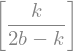

In [13]:
from sympy import *
init_printing()

phat, k, b = symbols("phat,k,b")

WR = (1-phat)*b
WW = phat * (b-k) + (1-phat)*(b-k/2)

solve(WR-WW,phat)

## Exercise 1c: Spiteful

The payoff matrix now becomes:

|  | Rest | Wash | Spiteful |
|:-------:|:-------:|:-------:|:-------:|
| Rest | $0$ | $b$ | $0$ |
| Wash | $b-k$ | $b-\frac{k}{2}$ | $b-\frac{k}{2}$ |
| Spiteful | $0$ | $b-\frac{k}{2}$ | $b-\frac{k}{2}$ |

#### Spiteful ESS against Rest
To show that Spiteful is an ESS against Rest, we need to show that $W(S\mid S) > W(R\mid S)$. We have
\begin{align}
W(S\mid S)  &= b-\frac{k}{2} \\
W(R\mid S) &= 0. \\
\end{align}
Hence, 
\begin{align}
W(S\mid S) &> W(R\mid S) \\
b-\frac{k}{2} &> 0,
\end{align}
so Spiteful is an ESS against Rest whenever $b>\frac{k}{2}$ (which holds as we can assume $b>k$)

In terms of biology, Spiteful is an ESS against Rest, as Rest does not reap any rewards against Spiteful (because Spiteful will just do nothing if Rest does nothing), while Spiteful gets $b-\frac{k}{2}$ every time it plays against itself.

#### Spiteful ESS against Wash?

To show that Spiteful is not an ESS against Wash, we have to show that $W(S\mid S)\leq W(W \mid S)$. We have
\begin{align}
W(S\mid S)  &= b-\frac{k}{2} \\
W(W\mid S) &= b-\frac{k}{2} \\
\end{align}
Hence, 
\begin{align}
W(S\mid S) = W(W\mid S),
\end{align} 
which is not an ESS.

Spiteful is not an ESS against Wash, as in the absence of Rest, both strategies are phenotypically the same. 

### Ex1c continued: mixed Wash/Rest equilibrium cannot be invaded
Also show that Spiteful cannot invade the mixed Wash/Rest equilibrium unless k < 0:

At that equilibrium we have $W(W) = W(R)$, while the equilibrium frequency of Rest is given by $\hat{p} = \frac{k}{2b -k}$. We then have to show that the growth rates of Rest (or Wash) are larger than that of Spiteful, or $W(R) > W(S)$.

First, we substitute for $\hat{p}$ in the expression of $W(R)$ above (one could also pick $W(H)$, but this is simpler):
\begin{align}
W(R) = \left (1 - \hat{p} \right) b.
\end{align}
We can indeed substitute for $\hat{p} = \frac{k}{2b -k }$ but let's hold off and do that when we have to compare $W(R)$ and $W(S)$ later.

Then, we calculate an expression for a rare Spiteful individual that invades. Its fitness W(S) is:
\begin{align}
W(S) = \hat{p} \cdot 0 + \left ( 1- \hat{p} \right ) \left ( b - \frac{k}{2} \right ).
\end{align}

Hence, we have $W(R)>W(S)$ unless $k < 0$. Hence, Spiteful cannot invade, similar to the notion that Retaliator cannot invade a Hawk Dove equilibrium (see McE&B, p50). A retaliator cannot invade at that equilibrium, because by playing Hawk against a Hawk and Dove against a Dove, it has 

# Exercise 2: display costs

### Exercise 2a
We have the payoff matrix

|       | Hawk | Dove |
|:------:|:------:|:------:|
|Hawk | $\frac{v-c}{2}$ | $v$ |
|Dove | $0$ | $\frac{v - d}{2}$ |

Prove that neither Hawk or Dove is an ESS. 

As we know, Hawk is only an ESS when $v>c$ (which I guess we need not consider), as:
\begin{align}
W(H\mid H) &> W(D \mid H) \\
\frac{v-c}{2} &> 0.
\end{align}

Dove should be an ESS when
\begin{align}
W (D\mid D) &> W (H \mid D) \\
\frac{v-d}{2} &> v
\end{align}
which also does not hold, as $d\geq 0$.

### Exercise 2b

Show that the mixed equilibrium at which the frequency of hawks is
\begin{align}
\hat{q} &= \frac{v + d}{c+d}.
\end{align}

Let us derive expressions for $W(H)$ and $W(D)$:
\begin{align}
W(H) &= w_{0} + q \frac{v-c}{2} + (1-q) v \\
W(D) &= w_{0} + (1-q) \frac{v-d}{2}.
\end{align}

Hence, at equilibrium we have $W(H)-W(D)=0$ and substituting and solving for $\hat{q}$, we have
\begin{align}
\hat{q} \frac{v-c}{2} + \left (1 - \hat{q} \right) v - \left ( 1 - \hat{q} \right ) \frac{v-d}{2} &= 0 \\
\hat{q} \frac{v-c}{2} + \left (1 - \hat{q} \right) \left (v - \frac{v-d}{2}\right) &= 0\\
\hat{q} \frac{v-c}{2} + \left (1 - \hat{q} \right) \frac{v + d}{2} &= 0\\
\hat{q} (v -c )+ \left (1 - \hat{q} \right) (v + d)&= 0\\
\hat{q} (-c - d) &= -(v + d) \\
\hat{q} &= \frac{v+d}{c+d}.
\end{align}

### Exercise 2c

Does adding a display cost change the biological conclusions we draw from the game? To some extent, yes: equilibrium frequences $\hat{q}$ of Hawk become more biased towards Hawk relative to a scenario where display costs are absent. 

But even when the display costs are at their maximum, $d=v$, we find that $\hat{q} = \frac{2v}{c + v}$. As $c>v$, $\hat{q} < 1$.

Hence it is still an intermediate equilibrium where some Doves are maintained, as paying the display cost $d$ is still less than the fighting cost $c$ that a Hawk has to pay.

# Exercise 3: more display costs

### Exercise 3a
Give the game matrix when adding the Bourgeois strategy.


|       | Hawk | Dove     | Bourgeois |
|:------:|:------:|:------:|:------:|
|Hawk | $\frac{v-c}{2}$ | $v$ | $\frac{1}{2}v + \frac{1}{2}\frac{v-c}{2}$ |
|Dove | $0$ | $\frac{v - d}{2}$ | $\frac{1}{2}\frac{v - d}{2}$ |
|Bourgeois | $\frac{1}{2}\frac{v-c}{2}$ | $\frac{1}{2}v + \frac{1}{2} \frac{v - d}{2}$ | $\frac{1}{2}v$ |

To highlight an example entry, let us focus on:
\begin{align}W(D \mid B) = \frac{1}{2} \frac{v-d}{2} + \frac{1}{2}\cdot 0 = \frac{1}{2} \frac{v-d}{2}.
\end{align}
When the Dove owns the resource (with probability $\frac{1}{2}$), Bourgeois plays Dove and both share gain and both pay display costs $\frac{v-d}{2}$. When the Bourgeois owns the resources, it plays Hawk and Dove gets nothing. 

#### Show that Bourgeois is an ESS:

First we show that Bourgeois is an ESS against Dove:
\begin{align}
W(B\mid B) &> W(D\mid B)\\
\frac{1}{2}v &> \frac{1}{2} \frac{v-d}{2} \\
v &> \frac{v - d}{2} \\
\frac{v}{2} &> -\frac{d}{2}\\
v &> -d,
\end{align}
which always holds. In biological terms, Bourgeois is an ESS against Dove because pairs of Bourgeois always play Hawk against Dove alternatingly, rather than Dove against Dove. Thus display costs are avoided.


Next, we show that Bourgeois is an ESS against Hawk:
\begin{align}
W(B\mid B) &> W(H\mid B)\\
\frac{1}{2}v &> \frac{1}{2}v + \frac{1}{2}\frac{v-c}{2}\\
v &> v + \frac{v - c}{2}\\
0 &> \frac{v - c}{2}\\
c &> v,
\end{align}
which always holds for the same reasons it held on p56: pairs of Bourgeois avoid costs of fighting as one always plays  Hawk while the other plays Dove.

## Exercise 3b

Show that rare Bourgeois individuals have the same fitness as Hawks and Doves at the mixed equilibrium $\hat{q} = \frac{v+d}{c+d}$:

Let us calculate the fitness of a rare Bourgeois $W(B)$ at this equilibrium. At this equilibrium, we already have $W(H)=W(D)$, so
\begin{align}
W(B) = W(H) = W(D)
\end{align}
should hold.

1. The fitness of a rare Bourgeois $W(B)$ is calculated by taking the average of payoffs to a Bourgeois when encountering a Hawk (at frequency $\hat{q}$) and a Dove (at frequency $1-\hat{q}$):
\begin{align}
W(B) &= \hat{q} W(B\mid H) + \left(1-\hat{q}\right) W(B\mid D) \\
W(B) &= \hat{q}\frac{1}{2} \frac{v-c}{2} + \left(1-\hat{q}\right) \left(\frac{1}{2}v + \frac{1}{2} \frac{v - d}{2}\right).
\end{align}
We do not immediately substitute for $\hat{q} = \frac{v+d}{c+d}$ yet, as we need to compare this to either $W(H)$ or $W(D)$ which also contains terms of $\hat{q}$.

2. The fitness of a Dove W(D) at the mixed equilibrium $\hat{q} = \frac{v+d}{c+d}$ is
\begin{align}
W(D) &= w_{0} + (1-\hat{q}) \frac{v-d}{2}.
\end{align}

Setting $W(B)= W(D)$, we have
\begin{align}
W(B) - W(D) &= 0\\
\hat{q}\frac{1}{2} \frac{v-c}{2} + \left(1-\hat{q}\right) \left(\frac{1}{2}v + \frac{1}{2} \frac{v - d}{2}\right) - (1-\hat{q}) \frac{v-d}{2} &= 0\\
\hat{q}\frac{1}{2} \frac{v-c}{2} + \left(1-\hat{q}\right) \left(\frac{1}{2}v - \frac{1}{2} \frac{v - d}{2}\right) &= 0\\
\frac{v+d}{c+d} \frac{1}{2} \frac{v-c}{2} + \left(1 - \frac{v+d}{c+d}\right) \left(\frac{1}{2}v - \frac{1}{2} \frac{v - d}{2}\right) &\stackrel{\hat{q} = \frac{v+d}{c+d}}{=} 0\\
\frac{v+d}{c+d} \frac{1}{2} \frac{v-c}{2} - \frac{v-c}{c+d} \left(\frac{1}{2}v - \frac{1}{2} \frac{v - d}{2}\right) &= 0\\
\frac{1}{2}\frac{v-c}{c+d}\left[ \frac{v+d}{2} - \left(v -  \frac{v - d}{2}\right)\right ] &= 0\\
\frac{1}{2}\frac{v-c}{c+d}\left[ \frac{v}{2} + \frac{d}{2} - v + \frac{v}{2} - \frac{d}{2}\right ] &= 0\\
\frac{1}{2}\frac{v-c}{c+d} \cdot 0 &= 0.\\
\end{align}


Hence, fitness of Bourgeois is indeed equal to that of Dove (and Hawk, which you can check for yourself) at the mixed equilibrium. Hence, Bourgeois can drift in, similar to what was found on p57. Display costs thus do not affect the biological conclusions we draw from the Bourgeois-Hawk-Dove game.

# Exercise 4: correlated vs uncorrelated asymmetries

## Exercise 4a:

Show that Assessor is an ESS against Bourgeois when \begin{align}x > \frac{v}{2 (v + c)}.\end{align}Conditions for Bourgeois to be an ESS against Dove/Hawks hold (p57), implying that $c>v$. Also conditions for Assessor to be an ESS against Dove/Hawks hold (pp. 59-60), so that $xc > (1-x)v$.

### Ex 4a I: Assessor ESS against Bourgeois
To show that Assessor is an ESS against Bourgeois, we need to show that $V(A\mid A)>V(B \mid A)$. We already know $V(A\mid A) = \frac{v}{2}$. The payoff when Bourgeois plays Assessor is 
\begin{align}
    V(B \mid A) &= \underbrace{ \frac{1}{2}\left( \frac{1}{2}v + \frac{1}{2}\frac{v}{2} \right )}_{\text{Bourgeois larger}} + \underbrace{\frac{1}{2} \left \{ \frac{1}{2} \left [ (1-x)v - x c \right ] + \frac{1}{2}\cdot 0 \right \} }_{\text{Bourgeois smaller}} \\
  &=\frac{5}{8} v - \frac{1}{4} x (v + c) \label{eq:ex4a:VAB}
\end{align}

Bourgeois is larger (first term on rhs) with probability $\frac{1}{2}$, in which case Assessor is smaller and thus always plays Dove. If Bourgeois also arrives first (with probability $\frac{1}{2}$), it plays Hawk. As Assessor always plays Dove, the Bourgeois' payoff is $v$. If Bourgeois arrives second (with probability $\frac{1}{2}$), it plays Dove. As Assessor also plays Dove, the Bourgeois' payoff is $\frac{v}{2}$.

Bourgeois is smaller (second term on rhs) with probability $\frac{1}{2}$, in which case Assessor is larger and thus always plays Hawk. If Bourgeois arrives first (prob. $\frac{1}{2}$, it plays Hawk. The Bourgeois' probability of winning the fight is then $(1-x)$ (as the Bourgeois is smaller), in which case its payoff is $v$. In case the Bourgeois loses, however, (with probability $x$) its payoff is $-c$. If Bourgeois arrives second, it will play Dove against the Assessor playing Hawk, so that is payoff is 0.

Hence, we check whether $V\left(A \mid A\right) > V\left(B \mid A\right)$:
\begin{align}
\frac{v}{2} &> \frac{5}{8} v - \frac{1}{4} x (v + c)\\
-\frac{1}{8}v &> - \frac{1}{4} x (v + c)\\
\frac{4}{8}\frac{v}{v+c} &< x  \quad \text{divide by $-\frac{1}{4}(v+c)$ which is strictly negative, hence flip the inequality}\\
\frac{1}{2}\frac{v}{v+c} &< x.\\
\end{align}

Clearly the probability of winning when large should be large enough so that an assessor can reap its benefits against other players.

#### Ex 4a I continued: check wheter Assessor is an ESS against Bourgeois in `sympy`

In [14]:
v, x, c = symbols("v x c")

VAA=v/2
VBA=5/8*v-1/4*x*(v+c)

reduce_inequalities(4*VAA>4*VBA,x)

Which boils down to the same thing as above.

### Ex 4a II: Bourgeois ESS against Assessor

Show also that Bourgeois is an ESS against Assessor, provided that $x < \frac{v + 2c}{2\left(v + c\right)}$.

To solve this we need to show that $V(B \mid B) > V(A \mid B)$. The payoff of Bourgeois playing against itself is known already (p57): $V(B \mid B)= \frac{v}{2}$. Now, we need to calculate $V(A \mid B)$:
\begin{align}
V(A \mid B) &= \underbrace{\frac{1}{2} \left [ \frac{1}{2} v + \frac{1}{2} \left ( x v - (1-x)c \right ) \right ] }_{\text{Assessor larger}} + \underbrace{\frac{1}{2} \left [ \frac{1}{2}\frac{v}{2} + \frac{1}{2} \cdot 0 \right ] }_{\text{Assessor smaller}}\\
&= \frac{3}{8} v + \frac{1}{4} x (v +c ) - \frac{1}{4} c.
\end{align}

Assessor is larger with probability $\frac{1}{2}$ (first term on rhs) hence plays Hawk. If Assessor arrives first (with probability $\frac{1}{2}$), Bourgeois will play Dove, so that Assessor's payoff is $v$. If Assessor arrives second (with probability $\frac{1}{2}$), Bourgeois will play Hawk like Assessor does. In this case, Assessor wins with probability $x$ and gets payoff $v$ and does not win with probability $1-x$, in which case Assessor gets payoff $-c$.

Assessor is smaller with probability $\frac{1}{2}$ (second term on rhs) hence plays Dove. If Assessor arrives first (with probability $\frac{1}{2}$), Bourgeois will also play Dove, so payoff is $\frac{v}{2}$. Alternatively, if Assessor arrives second (with probability $\frac{1}{2}$), Bourgeois will play Hawk and Assessor gets payoff 0.

Hence, we check $V(B \mid B) > V(A \mid B)$:
\begin{align}
\frac{v}{2} &> \frac{3}{8} v + \frac{1}{4} x (v +c ) - \frac{1}{4} c\\
\frac{1}{8}v + \frac{1}{4}c &> \frac{1}{4} x (v +c )\\
v + 2 c &> 2 x (v +c )\\
\frac{v + 2 c}{2(v+c)} &> x \\
\end{align}

The probability of winning when large (rhs) should not be too large relative to gains that a Bourgeois makes when contests are determined based on random order (lhs), otherwise Assessor will invade.

#### Ex 4a II continued: check whether Bourgeois is an ESS against Assessor in `sympy`

Irritating lack of further simplification by `sympy`:

In [15]:
# symbols already declared above...
VBB=v/2
VAB=1/2*(1/2*v+1/2*(x*v-(1-x)*c))+1/2*(1/2*v/2)

reduce_inequalities(4*VBB>4*VAB,x)

which can be reworked into the equality above.

## Exercise 4b

Let $p$ be the frequency of an Assessor. Show that \begin{align}\tilde{p} = \frac{v(1-2x)+2c(1-x)}{2 c}\end{align} is an unstable equilibrium.

### Ex 4b I: derive the equilibrium 

At equilibrium, we have $W(A) = W(B)$ and can derive $\tilde{p}$ from there. First, derive $W(A)$:

\begin{align}
W(A) &= p V(A \mid A) + (1-p) V(A \mid B)\\
V(A \mid A) &= \frac{v}{2}\quad \text{(see above and p59)}\\
V(A \mid B) &=  \frac{3}{8} v + \frac{1}{4} x (v +c ) - \frac{1}{4} c \quad \text{(see Bourgeois ESS against Assessor)}\\
W(A) &= p\frac{v}{2} + (1-p) \left [\frac{3}{8} v + \frac{1}{4} x (v +c ) - \frac{1}{4} c\right].
\end{align}

Then derive $W(B)$:
\begin{align}
W(B) &= p V(B \mid A) + (1-p) V(B \mid B)\\
V(B \mid A) &= \frac{5}{8} v - \frac{1}{4} x (v + c) \quad \text{(see Assessor ESS against Bourgeois}\\
V(B \mid B) &= \frac{v}{2} \quad \text{(see above and p57)}\\
W(B) &= p \left [ \frac{5}{8} v - \frac{1}{4} x (v + c) \right ] + (1-p) \frac{v}{2}
\end{align}

Then solve $W(A)=W(B)$ for $\hat{p}$:
\begin{align}
p\frac{v}{2} + (1-p) \left [\frac{3}{8} v + \frac{1}{4} x (v +c ) - \frac{1}{4} c\right] -p \left [ \frac{5}{8} v - \frac{1}{4} x (v + c) \right ] - (1-p) \frac{v}{2} &= 0
\end{align}

Multiplying all terms by 8 to get rid of fractions and expanding terms, we have
\begin{align}
4 vp + (1-p) [ 3v + 2 x (v +c ) - 2 c] - p [5 v - 2 x(v+c)] - (1-p)4v &= 0\\
4 vp + 3v + 2x(v+c) - 2c - 3vp - 2 px(v+c) + 2pc - 5vp + 2 px(v+c) - 4 v + 4 vp &= 0\\
-v + 2x(v+c) - 2c + 2pc &= 0\\
p &= \frac{v + 2c - 2x (v+c)}{2c}\\
\tilde{p} &= \frac{v (1-2x) + 2c(1-x)}{2c} \label{eq:ex4b:equilibrium}\\
\end{align}

### Ex 4b II: Stability of $\tilde{p}$

To this end, we first have to calculate the derivative of the haploid recursion equation, substitute for an equilibrium and check whether the absolute value of the result is less than one.
We might substitute for the internal equilibrium $\tilde{p}$ above. However, this may not be ideal, as stability of internal equilibria is typically rapidly getting into untractable results territory. Hence, why not substitute for the other equilibria $\tilde{p} = 0$ and $\tilde{p} = 1$? If those are both unstable, our internal equilibrium should be stable. 

We need to calculate the derivative of
\begin{align}
 \frac{\mathrm{d}}{\mathrm{d} p_{t}} p_{t+1} &=  \frac{\mathrm{d}}{\mathrm{d} p_{t}}\left [ p_{t} \frac{W(A)}{\bar{W}} \right ],
\end{align} 
where $\bar{W} = p_{t} W(A) + \left ( 1 - p_{t} \right ) W(B)$.

Then we need to check whether
\begin{align}
-1 &< \left . \frac{\mathrm{d}}{\mathrm{d} p_{t}} p_{t+1} \right |_{p = \tilde{p}} &< 1
\end{align}
for $\tilde{p} = 0$ and $\tilde{p} = 1$:

### Ex 4b II.1: calculating the derivative:

Using the product and quotient rules, our implicit derivative of the haploid recursion equation is
\begin{equation}
 \frac{\mathrm{d}}{\mathrm{d} p_{t}} p_{t+1} = \frac{W(A)}{\bar{W}} + p_{t} \left[ \frac{\frac{\mathrm{d}W(A)}{\mathrm{d}p_{t}}\bar{W} - W(A) \frac{\mathrm{d}\bar{W}}{\mathrm{d}p_{t}} }{\bar{W}^{2}}\right ],\label{eq:implicit_deriv}
 \end{equation}

where:
\begin{align}
\frac{\mathrm{d}W(A)}{\mathrm{d}p_{t}} &= V(A \mid A) - V(A \mid B)\\
& =  \frac{1}{8} v - \frac{1}{4} x (v +c ) + \frac{1}{4} c \label{eq:ex4b:dWa}\\
\frac{\mathrm{d}\bar{W}}{\mathrm{d}p_{t}} &= \frac{\mathrm{d}}{\mathrm{d} p_{t}}\left [ p_{t} W(A) + \left(1 - p_{t} \right ) W(B) \right ]  \\
&= W(A) + p_{t} \frac{\mathrm{d}W(A)}{\mathrm{d}p_{t}} - W(B) + \left(1 - p_{t} \right ) \frac{\mathrm{d}W(B)}{\mathrm{d}p_{t}} \label{eq:ex4b:dWbar}\\
\end{align}

We can substitute the latter derivatives back into eq. $\eqref{eq:implicit_deriv}$ but we can also try to wait with that and see what happens if we substitute for $\tilde{p} = 0$ and $\tilde{p} = 1$ in eq. $\eqref{eq:implicit_deriv}$, as typically things simplify.

### Ex 4b II.2: evaluating stability of equilibrium $\tilde{p} = 0$

Substituting for $\tilde{p}=0$ in eq. $\eqref{eq:implicit_deriv}$ yields
\begin{align}
\left . \frac{\mathrm{d}}{\mathrm{d} p_{t}} p_{t+1} \right |_{p = \tilde{p} = 0} &= \left . \frac{W(A) }{\bar{W}} \right |_{p = \tilde{p} = 0}
\end{align}
as the second term in eq. $\eqref{eq:implicit_deriv}$ is multiplied by $p_{t}$ and thus vanishes.

Moreover,
\begin{align}
\left . W(A) \right |_{p=\tilde{p}=0} &= V \left( A \mid B \right ) = \frac{3}{8} v + \frac{1}{4} x (v +c ) - \frac{1}{4} c \\
\left . \bar{W} \right |_{p=\tilde{p}=0} &= \left . W(B) \right |_{p=\tilde{p}=0} = V \left ( B \mid B \right ) = \frac{v}{2}
\end{align}.

Substituting the two expressions above in eq. $\eqref{eq:implicit_deriv}$ yields
\begin{align}
\left . \frac{\mathrm{d}}{\mathrm{d} p_{t}} p_{t+1} \right |_{p = \tilde{p} = 0} &= \left . \frac{W(A) }{\bar{W}} \right |_{p = \tilde{p} = 0}\\
&= \frac{2}{v} \left [ \frac{3}{8} v + \frac{1}{4} x (v +c ) - \frac{1}{4} c \right ]
\end{align}

Let us then check whether $\tilde{p} = 0$ is indeed stable, or 
\begin{align}
-1 &< \frac{2}{v} \left [ \frac{3}{8} v + \frac{1}{4} x (v +c ) - \frac{1}{4} c \right ] < 1 & \\
-\frac{v}{2} &<  \frac{3}{8} v + \frac{1}{4} x (v +c ) - \frac{1}{4} c < \frac{v}{2} & \text{multiplying by $\frac{v}{2}$}\\
-\frac{7v}{8} + \frac{1}{4}c &< \frac{1}{4} x (v + c) < \frac{v}{8} + \frac{1}{4}c & \text{adding -$\frac{3}{8}v + \frac{1}{4} c$}\\
-7v + 2c &< 2 x (v + c) < v + 2c & \text{multiply by $8$}\\
\frac{2c-7v}{2(v+c)} &< x < \frac{v + 2c}{2 (v+c)} & \text{multiply by $\frac{1}{2(v+c)}$} \label{ex4b:stabcond:p0}
\end{align}

The condition
\begin{align}
x &< \frac{v + 2c}{2 (v+c)} 
\end{align}
is the one that always holds if we can assume that Bourgeois is an ESS against Assessor.

The other conditition, however
\begin{align}
\frac{2c-7v}{2(v+c)} &< x
\end{align}
is not given in McB. If $2c-7v<0$ then this condition does not affect the stability of $\tilde{p} = 0$ as $x$ is always within the range $0<x<1$.   

However, if $2c -7v > 0 \Rightarrow \frac{2}{7} c > v$, then it may well impose a lower limit on the probability of winning for Assessors when larger. We know that $c > v$, but it is not known whether $\frac{2}{7}c > v$. Interestingly, this condition was not mentioned by McE&B.

### Ex 4b II.3: evaluating stability of equilibrium $\tilde{p} = 1$

If we substitute for $p = \tilde{p}=1$, we now need to evaluate more parts in eq. $\eqref{eq:implicit_deriv}$, which I repeat here:
\begin{align}
 \frac{\mathrm{d}}{\mathrm{d} p_{t}} p_{t+1} = \frac{W(A)}{\bar{W}} + p_{t} \left[ \frac{\frac{\mathrm{d}W(A)}{\mathrm{d}p_{t}}\bar{W} - W(A) \frac{\mathrm{d}\bar{W}}{\mathrm{d}p_{t}} }{\bar{W}^{2}}\right ]
\end{align}
Working out the individual terms from eq. $\eqref{eq:implicit_deriv}$, we have
\begin{align}
\left . W(A) \right |_{p=\tilde{p}=1} &= V \left( A \mid A \right ) = \frac{v}{2} \\
\left . W(B) \right |_{p=\tilde{p}=1} &= V \left( B \mid A \right ) = \frac{5}{8} v - \frac{1}{4} x (v + c) & \text{see $\eqref{eq:ex4a:VAB}$} \\
\left . \bar{W} \right |_{p=\tilde{p}=1} &= \left . W(A) \right |_{p=\tilde{p}=1} = V \left ( A \mid A \right ) = \frac{v}{2}\\
\left . \frac{\mathrm{d}W(A)}{\mathrm{d}p_{t}} \right |_{p = \tilde{p} = 1} &= \frac{1}{8} v - \frac{1}{4} x (v +c ) + \frac{1}{4} c  & \text{see $\eqref{eq:ex4b:dWa}$} \\
\left . \frac{\mathrm{d}\bar{W}}{\mathrm{d}p_{t}} \right |_{p = \tilde{p} = 1} &= \left . \left \{  W(A) + p_{t} \frac{\mathrm{d}W(A)}{\mathrm{d}p_{t}} - W(B) + \left(1 - p_{t} \right ) \frac{\mathrm{d}W(B)}{\mathrm{d}p_{t}} \right \} \right |_{p = \tilde{p} = 1}\\
&= \frac{v}{2}  +  \left [ \frac{1}{8} v - \frac{1}{4} x (v +c ) + \frac{1}{4} c \right ] - \left ( \frac{5}{8} v - \frac{1}{4} x (v + c) \right ) + 0 \\
&= \frac{1}{4} c
\end{align}

Hence we have
\begin{align}
\left .  \frac{\mathrm{d}}{\mathrm{d} p_{t}} p_{t+1} \right |_{p = \tilde{p}=1} &= 1 + \frac{\left ( \frac{1}{8} v - \frac{1}{4} x (v +c ) + \frac{1}{4} c \right )\frac{v}{2} - \frac{v}{2} \frac{1}{4}c}{\frac{v^2}{4}}\\
&= 1 + \frac{ \frac{1}{8} v - \frac{1}{4} x (v +c ) + \frac{1}{4} c  - \frac{1}{4}c}{\frac{v^2}{4}}\\
&= \frac{\frac{v}{2}}{\frac{v}{2}} + \frac{\frac{1}{8} v - \frac{1}{4} x (v +c )}{\frac{v}{2}}\\
&= \frac{\frac{5}{8} v - \frac{1}{4} x (v +c )}{\frac{v}{2}}\\
\end{align}

Assessing the inequalities

\begin{align}
-1 &< \frac{\frac{5}{8} v - \frac{1}{4} x (v +c )}{\frac{v}{2}} < 1\\
-\frac{v}{2} &< \frac{5}{8} v - \frac{1}{4} x (v +c ) < \frac{v}{2} & \text{multiply out $\frac{v}{2}$ (strictly $+$ve)}\\
-\frac{9v}{8} &< - \frac{1}{4} x (v +c ) < -\frac{v}{8} & -\frac{5}{8} v\\
-9v &< - 2 x (v +c ) < -v & \times 8\\
\frac{9v}{2(v+c)} &> x > \frac{v}{2(v+c)} & \times \frac{1}{-2(v+c)} & \text{(negative, hence flip inequilaties)} \label{eq:ex4b:stabcond:p1}\\
\end{align}

The condition on the right is the condition that Assessor is an ESS against Bourgeois. The condition on the left is not explored by McE&B and implies that the benefits of winning, while $v < c$ may not be too small relative to the cost of losing (denominator).

### Ex 4b III: stability conditions in `sympy`:

First, obtain the equilibrium:

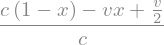

In [16]:
p =symbols("p")

half=Rational(1,2)
quarter=Rational(1,4)
three_eighth=Rational(3,8)
five_eighth=Rational(5,8)
WA=p*v*half+(1-p)*(three_eighth*v+quarter*x*(v+c)-quarter*c)
WB=p*(five_eighth*v-quarter*x*(v+c))+(1-p)*v*half

ex4c_eq = solve(WA-WB,p)

ex4c_eq[0]

which is the equilibrium in eq. $\eqref{eq:ex4b:equilibrium}$ when multiplying numerator and denominator by $2$.

#### Ex4b III.1 Substituting $\tilde{p}=0$ in `sympy` and calculating stability

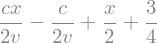

In [17]:
recursion= p*WA/(p*WA + (1-p)*WB)

deriv_ex4c=diff(recursion,p)


# substitute for an equilibrium phat = 0
deriv_ex4c_subs0=factor(deriv_ex4c.subs({p:0}))

simplify(deriv_ex4c_subs0)

So, we have our derivative evalulated at $p = \tilde{p} = 0$, or $\left . \frac{\mathrm{d} p_{t+1}}{\mathrm{d}p_{t}} \right |_{p_{t} = \tilde{p} = 0}$. We now need to check whether it is within the interval $-1<\left . \frac{\mathrm{d} p_{t+1}}{\mathrm{d}p_{t}} \right |_{p_{t} = \tilde{p} = 0}<1$. First check the right hand side of this interval:

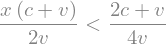

In [18]:
simplify(reduce_inequalities(deriv_ex4c_subs0<1,x))

Which can be simplified to
\begin{align}
x < \frac{v + 2c}{2(c+v)},
\end{align}
exactly the condition for when Bourgeois is an ESS against Assessor and the right hand side of eq. $\eqref{ex4b:stabcond:p0}$.

We also need to check whether the derivative $\left . \frac{\mathrm{d} p_{t+1}}{\mathrm{d}p_{t}} \right |_{p_{t} = \tilde{p} = 0} > -1$:

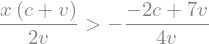

In [19]:
ineqmin1=reduce_inequalities([deriv_ex4c_subs0>-1],x)

ineqmin1

which can be simplified to 
\begin{align}
x &> \frac{2c - 7v}{2(c+v)}
\end{align}

This is the stability condition not found by McE&B on the left hand side of eq. $\eqref{ex4b:stabcond:p0}$.

#### Ex4b III.2 Substituting $\tilde{p}=0$ in `sympy` and calculating stability

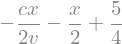

In [20]:
# substitute for an equilibrium phat = 1
deriv_ex4c_subs1=factor(deriv_ex4c.subs({p:1}))

simplify(deriv_ex4c_subs1)

Check whether derivative with $\tilde{p}=1$ substituted is is smaller than 1:

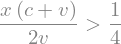

In [21]:
simplify(reduce_inequalities(deriv_ex4c_subs1<1,x))

Which is simplified to $x>\frac{v}{2(c+v)}$, exactly the ESS condition for Assessor against Bourgeois and the right-hand side condition in eq. $\eqref{eq:ex4b:stabcond:p1}$. 

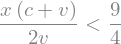

In [22]:
simplify(reduce_inequalities(deriv_ex4c_subs1>-1,x))

Which is simplified to $x<\frac{9v}{2(c+v)}$, the left-hand side condition in eq. $\eqref{eq:ex4b:stabcond:p1}$. 

## Exercise 4c

Assuming $x>0.5$, which of the two strategies is more likely to evolve?

This is Assessor as the probability of winning when large $x$ is larger than $\frac{1}{2}$, hence playing Hawk when large (and Dove when small) outweighs the benefit of taking cues from precedence (as Bourgeois does).